## Analysis of Spatial Transcriptomics 
- Author: Hadi Vareno
- E-mail: hadivareno@gmail.com
- Github: TheVareno

In [1]:
# load packages 
# NOTE use conda base environment 
# scanpy installed by pip 

#from spatialdata import read_zarr 
import scanpy as sc
import anndata as ad
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns 
sns.set_style('darkgrid');

In [84]:
# sc.logging.print_versions()
# sc.set_figure_params(facecolor="white", figsize=(8, 8))
# sc.settings.verbosity = 3

In [85]:
# read data 
# adata = ad.read_zarr('../data/data.zarr/tables/table')

In [3]:
adata = sc.datasets.visium_sge(sample_id="V1_Human_Lymph_Node");

/var/folders/8k/rjb28bw55l17dn_00z8_17t80000gn/T/ipykernel_1312/485066149.py:1: FutureWarning: Use `squidpy.datasets.visium` instead.
  adata = sc.datasets.visium_sge(sample_id="V1_Human_Lymph_Node");
/opt/anaconda3/envs/spatial-sc/lib/python3.13/site-packages/scanpy/datasets/_datasets.py:555: FutureWarning: Use `squidpy.read.visium` instead.
  return read_visium(sample_dir, source_image_path=source_image_path)
/opt/anaconda3/envs/spatial-sc/lib/python3.13/site-packages/anndata/_core/anndata.py:1776: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/anaconda3/envs/spatial-sc/lib/python3.13/site-packages/anndata/_core/anndata.py:1776: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [15]:
adata = sc.read_10x_h5('./data/V1_Human_Lymph_Node/filtered_feature_bc_matrix.h5')
adata.var_names_make_unique() 

adata.uns['spatial'] = sc.read_visium(path='./data/V1_Human_Lymph_Node/', 
                                      load_images=True).uns['spatial']

/opt/anaconda3/envs/spatial-sc/lib/python3.13/site-packages/anndata/_core/anndata.py:1776: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/anaconda3/envs/spatial-sc/lib/python3.13/site-packages/anndata/_core/anndata.py:1776: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/var/folders/8k/rjb28bw55l17dn_00z8_17t80000gn/T/ipykernel_1312/3430130154.py:4: FutureWarning: Use `squidpy.read.visium` instead.
  adata.uns['spatial'] = sc.read_visium(path='./data/V1_Human_Lymph_Node/',
/opt/anaconda3/envs/spatial-sc/lib/python3.13/site-packages/anndata/_core/anndata.py:1776: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/anaconda3/envs/spatial-sc/lib/python3.13/site-packages/anndata/_core/anndata.py:1776: UserWarning: Variable names ar

#### **Preprocessing**

In [16]:
sc.pp.filter_genes(adata, min_cells=3) 

In [17]:
sc.pp.normalize_total(adata, target_sum=1e4)

In [18]:
sc.pp.log1p(adata)

In [20]:
sc.pp.highly_variable_genes(adata, flavor='seurat', 
                           n_top_genes=2000)

In [21]:
adata = adata[:, adata.var.highly_variable]

#### **PCA, Neighbors, Clustering**

In [25]:
sc.pp.scale(adata, max_value=10);

In [26]:
sc.tl.pca(adata)

In [27]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)

In [28]:
sc.tl.leiden(adata, key_added='clusters')

/var/folders/8k/rjb28bw55l17dn_00z8_17t80000gn/T/ipykernel_1312/2499506427.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, key_added='clusters')


#### **UMAP, Tissue Mapping**

In [29]:
sc.tl.umap(adata)

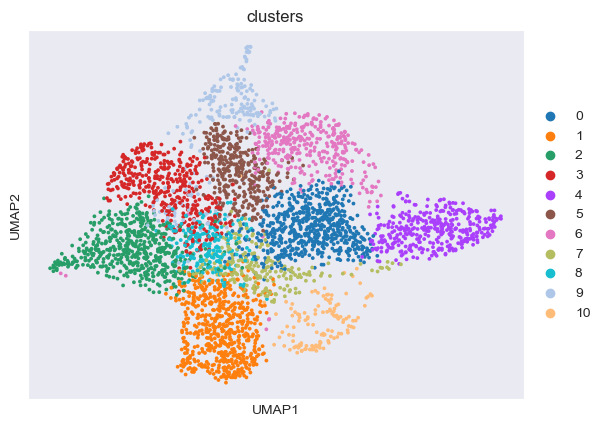

In [30]:
sc.pl.umap(adata, color=['clusters']) 

In [36]:
sc.pl.spatial(adata, color="clusters", spot_size=1.3)

/var/folders/8k/rjb28bw55l17dn_00z8_17t80000gn/T/ipykernel_1312/484415809.py:1: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(adata, color="leiden", spot_size=1.3)


KeyError: "Could not find 'spatial' or 'X_spatial' in .obsm"

---
### **OLD AnnData - Mouseliver dataset** 

In [5]:
adata.var_names_make_unique()
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

In [87]:
# Gene Expression Sparse Mat! 
print(type(adata.X))  
 

<class 'scipy.sparse._csr.csr_matrix'>


In [88]:
# Metadata for spots 
adata.obs.head()

,cell_ID,fov_labels,annotation
0,18,nucleus_boundaries,Kupffer cells
1,19,nucleus_boundaries,Other immunecells
2,32,nucleus_boundaries,Hepatocytes
3,33,nucleus_boundaries,Fibroblast
4,34,nucleus_boundaries,Fibroblast


In [89]:
# Gene names

print(adata.var_names_make_unique())
adata.var["mt"] = adata.var_names.str.startswith("MT-")  
adata.var.head()

None


,mt
Acta2,False
Adamtsl2,False
Adgre1,False
Adgrg6,False
Atp6v0d2,False


In [72]:
# Spatial coordinates dataframe  
# spatial columns is the key column
adata.obsm['spatial'] 

array([[5869.93939394,  791.03030303],
       [6390.48333333,  784.55      ],
       [2069.52980132, 1036.39072848],
       ...,
       [ 761.78488372, 6106.40697674],
       [ 386.25225225, 6105.82882883],
       [4574.5       , 4095.        ]])

In [90]:
adata.T

AnnData object with n_obs × n_vars = 99 × 3375
    obs: 'mt'
    var: 'cell_ID', 'fov_labels', 'annotation'
    uns: 'annotation_colors', 'spatialdata_attrs'
    varm: 'spatial'

#### **Tissue map**

In [75]:
# sc.pl.spatial(adata, spot_size=1.3, color='Itgae')

In [100]:
# TODO: change dataset and try again! --> sth wrong with this a!